In [1]:
############################# DRIVE PATH #################################
from google.colab import drive
drive.mount('/content/drive')
#the following line has to be changed to fit your Google drive organization
%cd 'drive/My Drive/Colab Notebooks/projet Adversarial/assignment3-aurele_julien_meriem/'
##########################################################################

from model import Model
from attacks import AttackFGSM
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/projet Adversarial/assignment3-aurele_julien_meriem


#Train the model with and without adversarial examples:


*   alpha is between 0 and 1 and controls the relative importance of adversarial examples compared to normal examples



In [2]:
#PARAMTERS:
eps = 0.05
epochs = 5

cuda:0
Files already downloaded and verified
cuda:0
[1,  2000] loss: 2.241
[1,  4000] loss: 2.050
[1,  6000] loss: 1.933
[1,  8000] loss: 1.828
[1, 10000] loss: 1.701
[1, 12000] loss: 1.675
[1, 14000] loss: 1.634
[1, 16000] loss: 1.539
[1, 18000] loss: 1.511
[1, 20000] loss: 1.484
[1, 22000] loss: 1.442
[1, 24000] loss: 1.435
[1, 26000] loss: 1.392
[1, 28000] loss: 1.342
[1, 30000] loss: 1.333
[1, 32000] loss: 1.336
[1, 34000] loss: 1.261
[1, 36000] loss: 1.294
[1, 38000] loss: 1.261
[1, 40000] loss: 1.244
[1, 42000] loss: 1.224
[1, 44000] loss: 1.192
[1, 46000] loss: 1.218
[1, 48000] loss: 1.183
[1, 50000] loss: 1.162
cuda:0
[2,  2000] loss: 1.115
[2,  4000] loss: 1.093
[2,  6000] loss: 1.106
[2,  8000] loss: 1.056
[2, 10000] loss: 1.090
[2, 12000] loss: 1.103
[2, 14000] loss: 1.019
[2, 16000] loss: 1.054
[2, 18000] loss: 1.039
[2, 20000] loss: 1.020
[2, 22000] loss: 1.042
[2, 24000] loss: 1.023
[2, 26000] loss: 1.017
[2, 28000] loss: 0.958
[2, 30000] loss: 1.025
[2, 32000] loss: 1.01

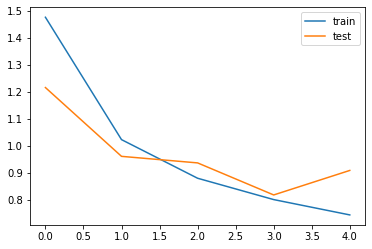

In [3]:
#Unsafe model:
unsafe_model = Model(path = 'unsafe_model.pth')
unsafe_model.loadData(bs=1)
unsafe_model.trainModel(epochs=epochs)

train_loss = unsafe_model.history_train
test_loss = unsafe_model.history_test
epoch_list = [i for i in range(len(train_loss))]

fig = plt.figure()
plt.plot(epoch_list, train_loss, label='train')
plt.plot(epoch_list, test_loss, label='test')
plt.legend()
plt.show()

unsafe_model.saveModel()

cuda:0
Files already downloaded and verified
cuda:0
[1,  2000] loss: 2.257
[1,  4000] loss: 2.147
[1,  6000] loss: 2.069
[1,  8000] loss: 2.012
[1, 10000] loss: 1.963
[1, 12000] loss: 1.938
[1, 14000] loss: 1.908
[1, 16000] loss: 1.873
[1, 18000] loss: 1.890
[1, 20000] loss: 1.832
[1, 22000] loss: 1.839
[1, 24000] loss: 1.824
[1, 26000] loss: 1.796
[1, 28000] loss: 1.796
[1, 30000] loss: 1.815
[1, 32000] loss: 1.779
[1, 34000] loss: 1.836
[1, 36000] loss: 1.794
[1, 38000] loss: 1.768
[1, 40000] loss: 1.766
[1, 42000] loss: 1.741
[1, 44000] loss: 1.748
[1, 46000] loss: 1.759
[1, 48000] loss: 1.743
[1, 50000] loss: 1.683
cuda:0
[2,  2000] loss: 1.751
[2,  4000] loss: 1.719
[2,  6000] loss: 1.679
[2,  8000] loss: 1.695
[2, 10000] loss: 1.667
[2, 12000] loss: 1.709
[2, 14000] loss: 1.707
[2, 16000] loss: 1.694
[2, 18000] loss: 1.688
[2, 20000] loss: 1.710
[2, 22000] loss: 1.680
[2, 24000] loss: 1.677
[2, 26000] loss: 1.716
[2, 28000] loss: 1.667
[2, 30000] loss: 1.665
[2, 32000] loss: 1.68

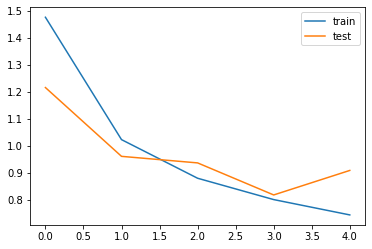

In [4]:
#Safe model:

safe_model = Model(path = 'safe_model.pth')
attack = AttackFGSM(safe_model,eps)

safe_model.loadData(bs=1)
safe_model.trainModelAdversarial(attack,epochs=epochs,alpha=0.5)

train_loss = unsafe_model.history_train
test_loss = unsafe_model.history_test
epoch_list = [i for i in range(len(train_loss))]

fig = plt.figure()
plt.plot(epoch_list, train_loss, label='train')
plt.plot(epoch_list, test_loss, label='test')
plt.legend()
plt.show()

safe_model.saveModel()

In [5]:
print('No attack:')
unsafe_model.testModel()
safe_model.testModel()

print('Attack (untargeted standard FGSM):')
attack_unsafe = AttackFGSM(unsafe_model,eps)
attack_safe = AttackFGSM(safe_model,eps)
accuracy_unsafe = attack_unsafe.evaluateModelUnderAttack()
accuracy_safe = attack_safe.evaluateModelUnderAttack()
print(accuracy_unsafe,accuracy_safe)

No attack:
Accuracy of the network on the 10000 test images: 69 %
Accuracy of the network on the 10000 test images: 67 %
Attack (untargeted standard FGSM):
Epsilon: 0.05	Test Accuracy = 541 / 10000 = 0.0541
Epsilon: 0.05	Test Accuracy = 2604 / 10000 = 0.2604
0.0541 0.2604
